In [1]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


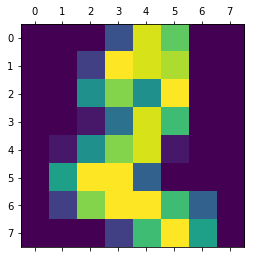

In [3]:
plt.matshow(digits.images[2])
plt.show()

In [4]:
k = 10
max_iterations = 100

In [5]:
def initial_cluster_centroids(X,k):
    return X[0:k,:]

In [6]:
def assign_cluster(X,centroids):
    expanded_vectors = tf.expand_dims(X,0)
    expanded_centroids = tf.expand_dims(centroids,1)
    distances = tf.reduce_sum(tf.square(tf.subtract(expanded_vectors,expanded_centroids)),2)
    mins = tf.argmin(distances,0)
    return mins

In [7]:
def recompute_centroids(X,Y):
    sums = tf.unsorted_segment_sum(X,Y,k)
    counts = tf.unsorted_segment_sum(tf.ones_like(X),Y,k)
    return sums/counts

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    X = digits.data
    centroids = initial_cluster_centroids(X,k)
    i, converged = 0, False
    while not converged and i < max_iterations:
        i += 1
        Y = assign_cluster(X,centroids)
        centroids = sess.run(recompute_centroids(X,Y))
        if i % 100 == 0:
            print(i)
    Y = sess.run(assign_cluster(X,centroids))

100


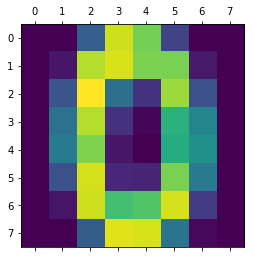

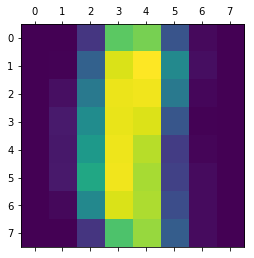

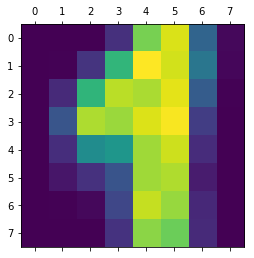

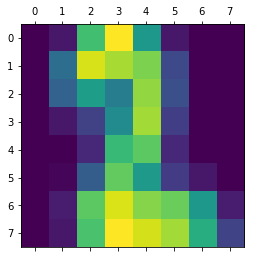

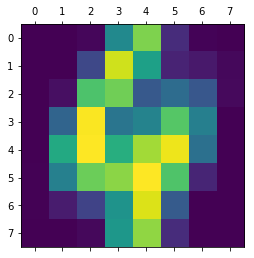

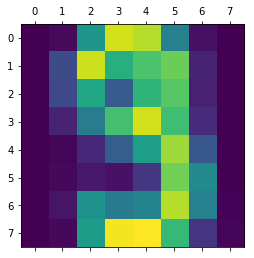

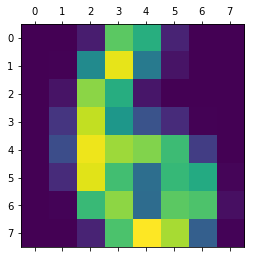

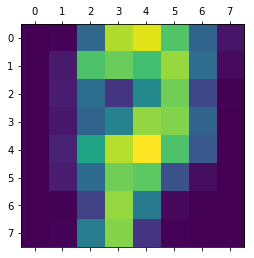

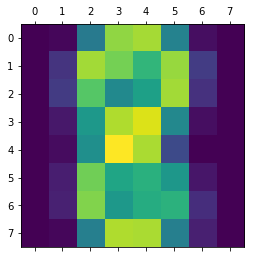

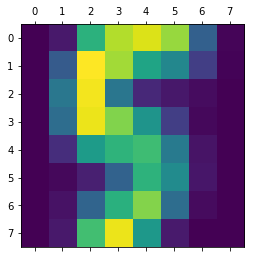

In [10]:
for i in range(k):
    plt.matshow(centroids.reshape((10,8,8))[i])

In [11]:
print(np.sum(Y == digits.target) / np.size(digits.target))


0.5381190873678353
